In [1]:
import os


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
data_df1 = pd.read_csv('train.csv')

In [4]:
data_df = data_df1.copy()

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# replacing the nan values of age column with median value
data_df['Age'].fillna(value = data_df['Age'].median() , inplace = True)

#Dropping the column 'Cabin' as it contains 687 NaN values out of 891
data = data_df.drop(['Cabin','Name','PassengerId'], axis = 1)

In [7]:
#define a dictionary which has unique value of 'Tickets' as keys and no.of tickets per unique ticket as values
ticketdict = data['Ticket'].value_counts().to_dict()

#defining new fare by dividing the old fare values by no.of tickets per unique ticket.
for i in range(len(data.Fare)):
  new_fare = data.Fare[i]/(ticketdict[data.Ticket[i]])
  data['Fare'] = data['Fare'].replace([data.Fare[i]],new_fare)
    
data 

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,0.453125,S
1,1,1,female,38.0,1,0,PC 17599,71.283300,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,0.990625,S
3,1,1,female,35.0,1,0,113803,3.318750,S
4,0,3,male,35.0,0,0,373450,0.251563,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,0.000004,S
887,1,1,female,19.0,0,0,112053,0.468750,S
888,0,3,female,28.0,1,2,W./C. 6607,5.862500,S
889,1,1,male,26.0,0,0,111369,0.468750,C


In [8]:
#Removing an outlier
index_names = data[data['Fare'] == max(data.Fare)].index
data.drop(index_names, inplace = True)
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,0.384270,2.310112,29.363112,0.523596,0.382022,7.614513
std,0.486696,0.835388,13.026937,1.103224,0.806409,13.618220
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.251563
50%,0.000000,3.000000,28.000000,0.000000,0.000000,3.318750
75%,1.000000,3.000000,35.000000,1.000000,0.000000,7.895800
max,1.000000,3.000000,80.000000,8.000000,6.000000,211.500000


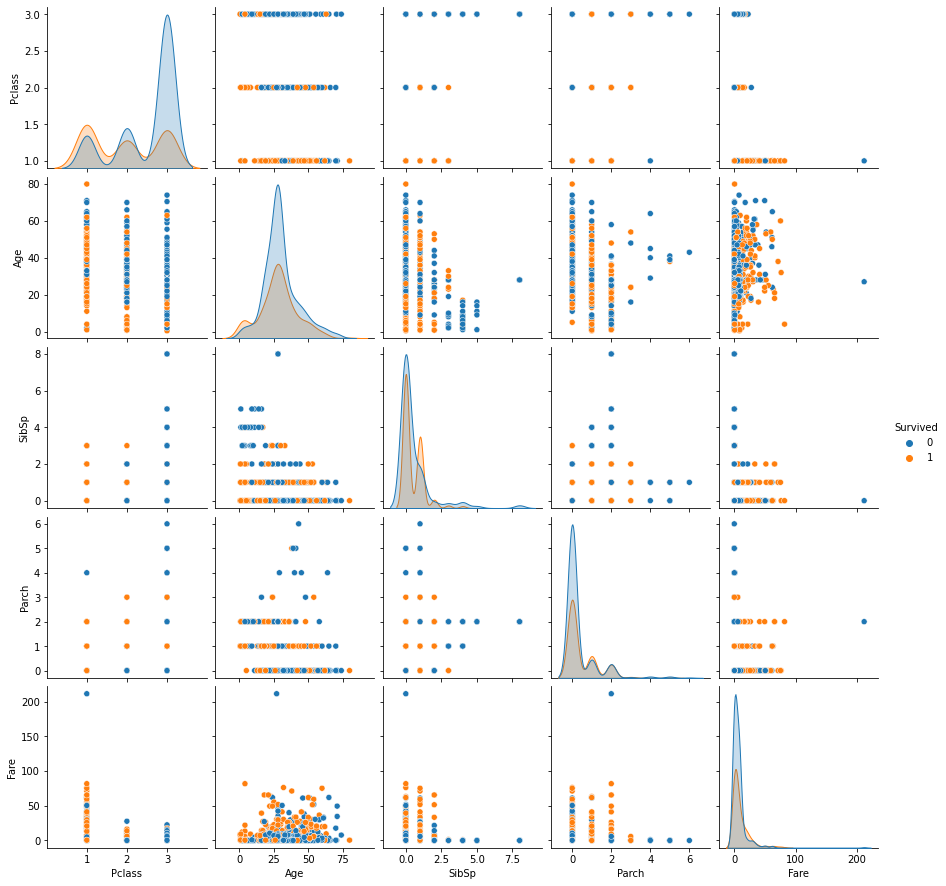

In [9]:
sns.pairplot(data,hue='Survived')

In [10]:
sex = pd.get_dummies(data['Sex'],drop_first = True)
embarked = pd.get_dummies(data['Embarked'],drop_first = True)
data = pd.concat([data,sex,embarked], axis = 1)
data.drop(['Sex', 'Embarked','Ticket'], axis =1 ,inplace = True)
data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,0.453125,1,0,1
1,1,1,38.0,1,0,71.283300,0,0,0
2,1,3,26.0,0,0,0.990625,0,0,1
3,1,1,35.0,1,0,3.318750,0,0,1
4,0,3,35.0,0,0,0.251563,1,0,1


In [11]:
X = data.drop('Survived',axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
predictions = dtree.predict(X_test)

In [17]:
print('confusion_matrix\n', confusion_matrix(y_test,predictions))
print('\n')
print('classification_report\n' ,classification_report(y_test,predictions))

confusion_matrix
 [[149  28]
 [ 30  87]]


classification_report
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       177
           1       0.76      0.74      0.75       117

    accuracy                           0.80       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators = 200)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
pred = rfc.predict(X_test)

In [22]:
print('confusion_matrix\n', confusion_matrix(y_test,pred))
print('\n')
print('classification_report\n' ,classification_report(y_test,pred))

confusion_matrix
 [[157  20]
 [ 31  86]]


classification_report
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       177
           1       0.81      0.74      0.77       117

    accuracy                           0.83       294
   macro avg       0.82      0.81      0.82       294
weighted avg       0.83      0.83      0.82       294

